In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format ='retina'
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import matplotlib.font_manager as fm
font_path = 'C:\Windows\Fonts\HMFMPYUN.TTF'
font_prop = fm.FontProperties(fname=font_path, size=20)
import seaborn as sns

# 1. 전처리

In [2]:
# g_2016=pd.read_csv('data/2016년 경기도 교통사고.csv', encoding='cp949')
s_2016=pd.read_csv('data/2016년 서울시 교통사고.csv', encoding='cp949')
# i_2016=pd.read_csv('data/2016년 인천시 교통사고.csv', encoding='cp949')
# g_2017=pd.read_csv('data/2017년 경기도 교통사고.csv', encoding='cp949')
s_2017=pd.read_csv('data/2017년 서울시 교통사고.csv', encoding='cp949')
# i_2017=pd.read_csv('data/2017년 인천시 교통사고.csv', encoding='cp949')
# g_2018=pd.read_csv('data/2018년 경기도 교통사고.csv', encoding='cp949')
s_2018=pd.read_csv('data/2018년 서울시 교통사고.csv', encoding='cp949')
# i_2018=pd.read_csv('data/2018년 인천시 교통사고.csv', encoding='cp949')
# g_2019=pd.read_csv('data/2019년 경기도 교통사고.csv', encoding='cp949')
s_2019=pd.read_csv('data/2019년 서울시 교통사고.csv', encoding='cp949')
# i_2019=pd.read_csv('data/2019년 인천시 교통사고.csv', encoding='cp949')
# g_2020=pd.read_csv('data/2020년 경기도 교통사고.csv', encoding='cp949')
s_2020=pd.read_csv('data/2020년 서울시 교통사고.csv', encoding='cp949')
# i_2020=pd.read_csv('data/2020년 인천시 교통사고.csv', encoding='cp949')

In [3]:
#gyounggi=pd.concat([g_2016,g_2017,g_2018,g_2019,g_2020])
seoul=pd.concat([s_2016,s_2017,s_2018,s_2019,s_2020])
#inchon=pd.concat([i_2016,i_2017,i_2018,i_2019,i_2020])

In [4]:
#del g_2016,g_2017,g_2018,g_2019,g_2020,s_2016,s_2017,s_2018,s_2019,s_2020,i_2016,i_2017,i_2018,i_2019,i_2020

In [5]:
#gyounggi.index=range(gyounggi.shape[0])
seoul.index=range(seoul.shape[0])
#inchon.index=range(inchon.shape[0])

In [6]:
scol=seoul.columns
scol

Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도'],
      dtype='object')

In [7]:
# plt.subplots(figsize=(12,20))
# plt.subplots_adjust(wspace=0.2, hspace=1)
# for i in range(len(scol))
# sns.countplot(y=scol[2], data=s)

SyntaxError: invalid syntax (<ipython-input-7-be79f4db5abd>, line 3)

In [ ]:
# seoul['사고년도']=seoul['사고일시'].map(lambda x : x.split('년')[0])
# seoul['사고월']=seoul['사고일시'].map(lambda x : x.split('년')[1].split('월')[0].replace(' ',''))
# seoul['사고일']=seoul['사고일시'].map(lambda x : x.split('년')[1].split('월')[1].replace(' ','').split('일')[0])
# seoul['사고시간']=seoul['사고일시'].map(lambda x : x.split('일')[1].replace(' ',''))
# seoul['사고날짜']=seoul['사고일시'].map(lambda x : x.split('년')[1].split('일')[0].replace(' ','')+'일')


In [ ]:
#day=seoul['사고날짜'].value_counts().to_frame()

In [ ]:
#day=day.reset_index()

In [ ]:
day

In [ ]:
seoul.columns

In [8]:
seoul['시군구']

0            서울특별시 중구 봉래동2가
1           서울특별시 동대문구 답십리동
2         서울특별시 영등포구 영등포동1가
3             서울특별시 중랑구 면목동
4             서울특별시 양천구 신월동
                ...        
191939       서울특별시 동대문구 제기동
191940        서울특별시 강동구 강일동
191941        서울특별시 강남구 삼성동
191942        서울특별시 송파구 신천동
191943        서울특별시 양천구 신월동
Name: 시군구, Length: 191944, dtype: object

In [9]:
pd.set_option('display.max_columns', 35)

In [10]:
sigungu=seoul[seoul['시군구'].str.contains('시')]

In [11]:
sigungu['구']=sigungu['시군구'].map(lambda x : x.split('시')[1].split(' ')[1])

In [12]:
sigungu.columns

Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도', '구'],
      dtype='object')

In [13]:
sigungunai=sigungu[sigungu['가해운전자 연령'].str.contains('세')]

In [14]:
import math
sigungunai['연령대']=sigungunai['가해운전자 연령'].map(lambda x : math.floor(int(x.split('세')[0])/10)*10)

In [15]:
sigungunai.groupby(['연령대','법규위반']).count()['사고번호'].to_frame().loc[0]

,사고번호
법규위반,
교차로운행방법위반,5
기타,7
불법유턴,8
신호위반,1
안전거리미확보,1
안전운전불이행,133
중앙선침범,4
직진우회전진행방해,8


In [16]:
sigungunai.groupby(['연령대','법규위반']).count()['사고번호'].to_frame().loc[10]

,사고번호
법규위반,
과속,10
교차로운행방법위반,145
기타,190
보행자보호의무위반,120
불법유턴,78
신호위반,1266
안전거리미확보,387
안전운전불이행,3266
중앙선침범,406


In [17]:
sigungunai['연령대']=sigungunai['연령대'].map(lambda x : str(x)+'대')

In [18]:
sigungunai

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,구,연령대
0,2016010100100001,2016년 1월 1일 00시,금요일,서울특별시 중구 봉래동2가,경상사고,0,0,1,0,차대차 - 측면직각충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,21세,상해없음,승용,남,57세,상해없음,중구,20대
1,2016010100100002,2016년 1월 1일 00시,금요일,서울특별시 동대문구 답십리동,경상사고,0,0,1,0,차대차 - 측면직각충돌,직진우회전진행방해,포장 - 건조,흐림,교차로 - 교차로부근,승용,남,55세,상해없음,승용,남,53세,경상,동대문구,50대
2,2016010100100003,2016년 1월 1일 00시,금요일,서울특별시 영등포구 영등포동1가,경상사고,0,0,2,0,차대차 - 측면직각충돌,안전거리미확보,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,54세,기타불명,승용,여,22세,경상,영등포구,50대
3,2016010100100004,2016년 1월 1일 00시,금요일,서울특별시 중랑구 면목동,경상사고,0,0,1,0,차대차 - 측면충돌,교차로운행방법위반,포장 - 건조,맑음,교차로 - 교차로안,이륜,남,16세,상해없음,자전거,남,69세,경상,중랑구,10대
4,2016010100100005,2016년 1월 1일 00시,금요일,서울특별시 양천구 신월동,중상사고,0,1,0,0,차대사람 - 차도통행중,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,56세,상해없음,보행자,여,83세,중상,양천구,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191939,2020123100100571,2020년 12월 31일 22시,목요일,서울특별시 동대문구 제기동,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,화물,남,35세,상해없음,자전거,남,41세,경상,동대문구,30대
191940,2020123100100572,2020년 12월 31일 22시,목요일,서울특별시 강동구 강일동,경상사고,0,0,1,0,차대차 - 정면충돌,중앙선침범,포장 - 건조,흐림,교차로 - 교차로부근,승용,남,61세,상해없음,승용,남,21세,경상,강동구,60대
191941,2020123100100591,2020년 12월 31일 23시,목요일,서울특별시 강남구 삼성동,경상사고,0,0,2,0,차대차 - 추돌,교차로운행방법위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,55세,기타불명,승용,남,29세,경상,강남구,50대
191942,2020123100100592,2020년 12월 31일 23시,목요일,서울특별시 송파구 신천동,중상사고,0,1,0,0,차대차 - 측면충돌,불법유턴,포장 - 건조,맑음,단일로 - 기타,승용,남,62세,상해없음,이륜,남,22세,중상,송파구,60대


In [19]:
a20=sigungunai.groupby(['연령대','사고유형']).count()['사고번호'].to_frame().loc['20대']/22961*100

In [20]:
a30=sigungunai.groupby(['연령대','사고유형']).count()['사고번호'].to_frame().loc['30대']/30586*100

In [21]:
a40=sigungunai.groupby(['연령대','사고유형']).count()['사고번호'].to_frame().loc['40대']/33240*100

In [22]:
a50=sigungunai.groupby(['연령대','사고유형']).count()['사고번호'].to_frame().loc['50대']/45273*100

In [23]:
a60=sigungunai.groupby(['연령대','사고유형']).count()['사고번호'].to_frame().loc['60대']/35906*100

<AxesSubplot:xlabel='사고유형'>

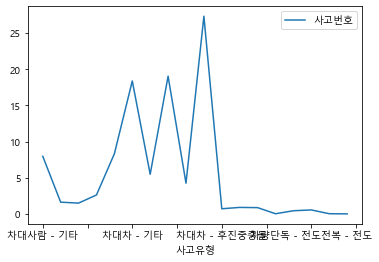

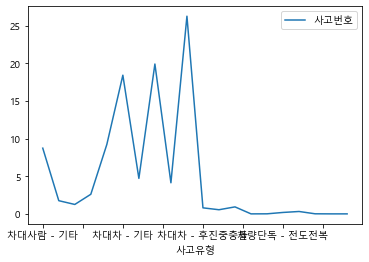

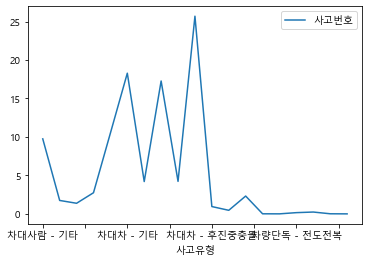

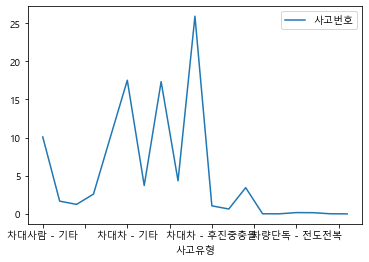

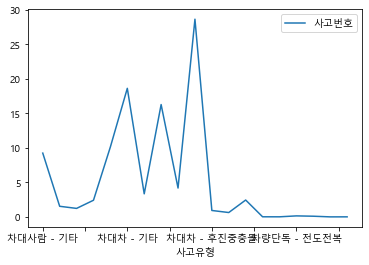

In [24]:
a20.plot()
a30.plot()
a40.plot()
a50.plot()
a60.plot()

In [25]:
sigungunai['연령대'].value_counts().to_frame()

,연령대
50대,45273
60대,35906
40대,33240
30대,30586
20대,22961
70대,11424
10대,6076
80대,1082
0대,167
90대,34


# 2. 지역구별  총 교통사고 횟수

In [26]:
sigungunai['구'].value_counts().to_frame()

,구
강남구,17722
송파구,13291
영등포구,11624
서초구,11490
동대문구,8339
강서구,7979
마포구,7748
노원구,7597
중랑구,7590
성북구,7248


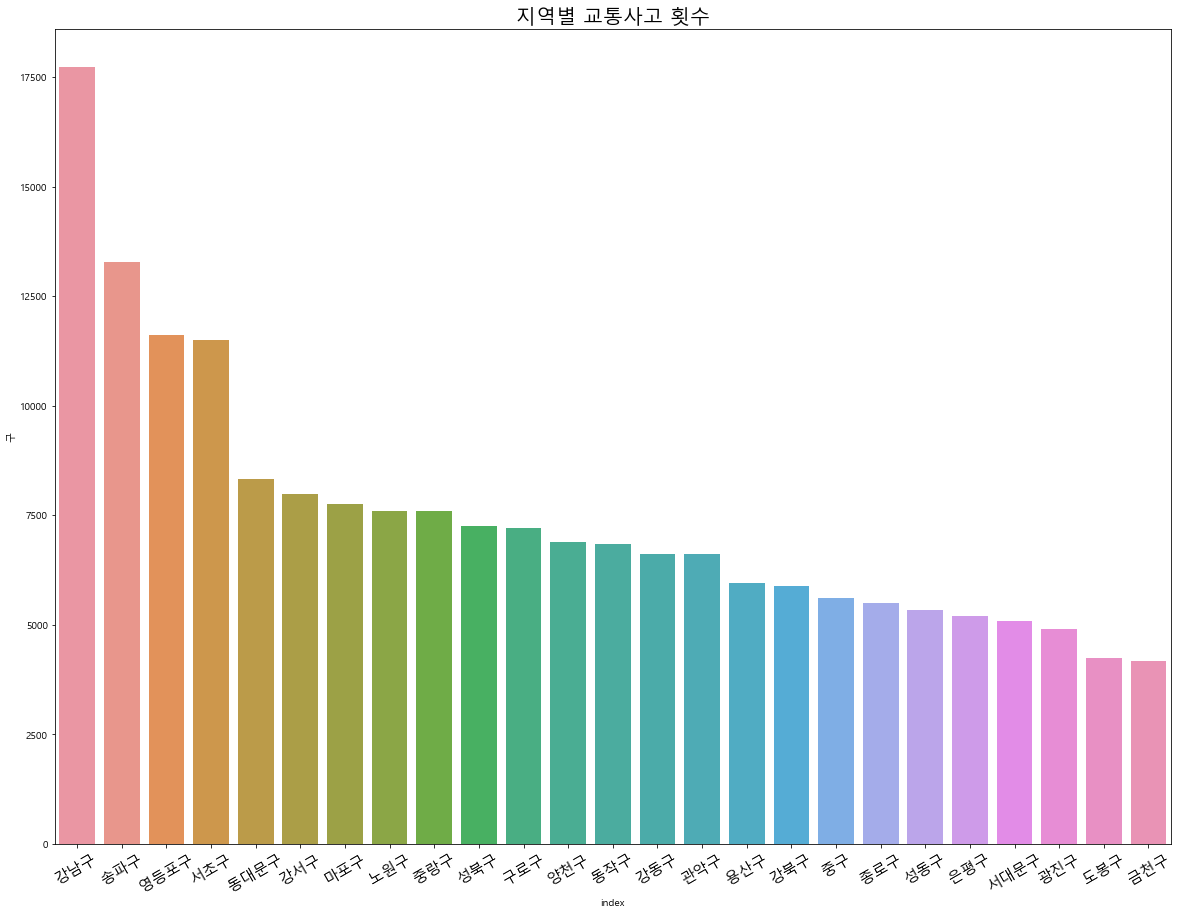

In [27]:
a=sigungunai['구'].value_counts().to_frame().reset_index()['index']
plt.figure(figsize=(20,15))
g=sns.barplot(data=sigungunai['구'].value_counts().to_frame().reset_index(), x='index',y='구')
g.set_xticklabels(labels=a,rotation=30, size=15)
plt.title('지역별 교통사고 횟수',fontsize=20)
plt.show()

# 3. 지역구, 연령대별 사고횟수

In [28]:
a=sigungunai.groupby(['구','연령대']).count()['사고번호']
a.unstack() # 지역구, 연령대별 사고횟수

연령대,0대,10대,20대,30대,40대,50대,60대,70대,80대,90대
구,,,,,,,,,,
강남구,5.0,234.0,2381.0,3787.0,3366.0,3813.0,3115.0,950.0,67.0,4.0
강동구,11.0,228.0,687.0,1039.0,1230.0,1663.0,1313.0,401.0,50.0,2.0
강북구,8.0,229.0,774.0,883.0,980.0,1442.0,1150.0,382.0,47.0,2.0
강서구,8.0,317.0,963.0,1332.0,1439.0,1986.0,1483.0,413.0,36.0,2.0
관악구,1.0,218.0,1018.0,1008.0,1100.0,1589.0,1266.0,384.0,32.0,1.0
광진구,11.0,172.0,719.0,824.0,759.0,1148.0,985.0,267.0,23.0,NaN
구로구,6.0,276.0,846.0,1156.0,1279.0,1871.0,1383.0,359.0,31.0,NaN
금천구,3.0,141.0,521.0,638.0,710.0,1139.0,796.0,214.0,19.0,NaN
노원구,9.0,338.0,876.0,1068.0,1472.0,1807.0,1478.0,498.0,50.0,1.0


In [29]:
sigungu

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,구
0,2016010100100001,2016년 1월 1일 00시,금요일,서울특별시 중구 봉래동2가,경상사고,0,0,1,0,차대차 - 측면직각충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,21세,상해없음,승용,남,57세,상해없음,중구
1,2016010100100002,2016년 1월 1일 00시,금요일,서울특별시 동대문구 답십리동,경상사고,0,0,1,0,차대차 - 측면직각충돌,직진우회전진행방해,포장 - 건조,흐림,교차로 - 교차로부근,승용,남,55세,상해없음,승용,남,53세,경상,동대문구
2,2016010100100003,2016년 1월 1일 00시,금요일,서울특별시 영등포구 영등포동1가,경상사고,0,0,2,0,차대차 - 측면직각충돌,안전거리미확보,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,54세,기타불명,승용,여,22세,경상,영등포구
3,2016010100100004,2016년 1월 1일 00시,금요일,서울특별시 중랑구 면목동,경상사고,0,0,1,0,차대차 - 측면충돌,교차로운행방법위반,포장 - 건조,맑음,교차로 - 교차로안,이륜,남,16세,상해없음,자전거,남,69세,경상,중랑구
4,2016010100100005,2016년 1월 1일 00시,금요일,서울특별시 양천구 신월동,중상사고,0,1,0,0,차대사람 - 차도통행중,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,56세,상해없음,보행자,여,83세,중상,양천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191939,2020123100100571,2020년 12월 31일 22시,목요일,서울특별시 동대문구 제기동,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,화물,남,35세,상해없음,자전거,남,41세,경상,동대문구
191940,2020123100100572,2020년 12월 31일 22시,목요일,서울특별시 강동구 강일동,경상사고,0,0,1,0,차대차 - 정면충돌,중앙선침범,포장 - 건조,흐림,교차로 - 교차로부근,승용,남,61세,상해없음,승용,남,21세,경상,강동구
191941,2020123100100591,2020년 12월 31일 23시,목요일,서울특별시 강남구 삼성동,경상사고,0,0,2,0,차대차 - 추돌,교차로운행방법위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,55세,기타불명,승용,남,29세,경상,강남구
191942,2020123100100592,2020년 12월 31일 23시,목요일,서울특별시 송파구 신천동,중상사고,0,1,0,0,차대차 - 측면충돌,불법유턴,포장 - 건조,맑음,단일로 - 기타,승용,남,62세,상해없음,이륜,남,22세,중상,송파구


# 4. 

In [30]:
s_2016_sm=s_2016[s_2016['사고내용']=='사망사고']
s_2017_sm=s_2017[s_2017['사고내용']=='사망사고']
s_2018_sm=s_2018[s_2018['사고내용']=='사망사고']
s_2019_sm=s_2019[s_2019['사고내용']=='사망사고']
s_2020_sm=s_2020[s_2020['사고내용']=='사망사고']

In [31]:
sigungunaichacha=sigungunai[sigungunai['사고유형'].str.contains('차대차')]
sigungunaichadan=sigungunai[sigungunai['사고유형'].str.contains('차량단독')]

In [32]:
sigungunai['사고유형'].unique()

array(['차대차 - 측면직각충돌', '차대차 - 측면충돌', '차대사람 - 차도통행중', '차대사람 - 기타',
       '차대차 - 정면충돌', '차대차 - 추돌', '차대차 - 기타', '차대사람 - 길가장자리구역통행중',
       '차량단독 - 기타', '차대사람 - 횡단중', '차량단독 - 공작물충돌', '차대사람 - 보도통행중',
       '차량단독 - 전도전복', '차량단독 - 도로외이탈 - 추락', '차량단독 - 주/정차차량 충돌',
       '차량단독 - 주차차량충돌', '차량단독 - 도로외이탈 - 기타', '차대차 - 후진중충돌',
       '차량단독 - 전도전복 - 전도', '차량단독 - 전도전복 - 전복'], dtype=object)

In [33]:
sigungunaichadan['사고내용'].value_counts()

경상사고      3277
중상사고      1819
부상신고사고     889
사망사고       147
Name: 사고내용, dtype: int64

In [34]:
sigungunaichacha['사고내용'].value_counts()

경상사고      94434
중상사고      30246
부상신고사고     9452
사망사고        482
Name: 사고내용, dtype: int64

In [35]:
sigungunaichacha_sm=sigungunaichacha[sigungunaichacha['사고내용']=='사망사고']

In [36]:
len(sigungunaichacha_sm[sigungunaichacha_sm['가해운전자 상해정도']=='사망'])/482*100 #사망사고발생시 가해운전자 사망확률

50.4149377593361

In [37]:
len(sigungunaichacha_sm[sigungunaichacha_sm['피해운전자 상해정도']=='사망'])/482*100 #사망사고발생시 피해운전자 사망확률

34.85477178423236

In [38]:
sm=pd.read_csv("data/12_20_death.csv", encoding='cp949')

In [39]:
sm_seoul=sm[sm['발생지시도']=='서울']

In [40]:
sm_seoul['주야'].value_counts()

야간    1730
주간    1259
Name: 주야, dtype: int64

In [41]:
sm_seoul['요일'].value_counts()

금    463
월    446
목    445
수    429
토    425
화    420
일    361
Name: 요일, dtype: int64

In [42]:
sm_seoul

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012010101,야간,일,1,1,0,0,0,서울,은평구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,949860,1957179,126.931890,37.612680
9,2012,2012010102,야간,일,1,4,0,3,0,서울,중구,차대차,측면충돌,측면충돌,신호위반,교차로,교차로내,승합차,승용차,955269,1952221,126.993477,37.568273
16,2012,2012010102,야간,일,1,1,0,0,0,서울,서초구,차대사람,횡단중,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,958875,1942835,127.034833,37.483840
29,2012,2012010118,야간,일,1,1,0,0,0,서울,영등포구,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,승합차,보행자,947288,1946929,126.903486,37.520151
37,2012,2012010307,주간,화,1,2,0,1,0,서울,관악구,차대차,기타,기타,안전거리 미확보,단일로,기타단일로,승용차,이륜차,951194,1942654,126.947969,37.481835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36842,2020,2020121210,주간,토,1,3,1,1,0,서울,동대문구,차대사람,기타,기타,신호위반,교차로,교차로횡단보도내,승용차,보행자,959241,1953481,127.038392,37.579863
37022,2020,2020091819,야간,금,1,1,0,0,0,서울,송파구,차대사람,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승합차,보행자,966618,1948511,127.122156,37.535312
37049,2020,2020093005,야간,수,1,2,1,0,0,서울,송파구,차대차,측면충돌,측면충돌,신호위반,교차로,교차로내,원동기장치자전거,화물차,964001,1945908,127.092562,37.511758
37059,2020,2020101004,야간,토,1,1,0,0,0,서울,송파구,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,966069,1944452,127.116168,37.498750


In [43]:
sigungunaichacha_sm['기상상태'].value_counts()

맑음    419
흐림     31
비      26
기타      4
눈       2
Name: 기상상태, dtype: int64

In [44]:
sigungunai

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,구,연령대
0,2016010100100001,2016년 1월 1일 00시,금요일,서울특별시 중구 봉래동2가,경상사고,0,0,1,0,차대차 - 측면직각충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,21세,상해없음,승용,남,57세,상해없음,중구,20대
1,2016010100100002,2016년 1월 1일 00시,금요일,서울특별시 동대문구 답십리동,경상사고,0,0,1,0,차대차 - 측면직각충돌,직진우회전진행방해,포장 - 건조,흐림,교차로 - 교차로부근,승용,남,55세,상해없음,승용,남,53세,경상,동대문구,50대
2,2016010100100003,2016년 1월 1일 00시,금요일,서울특별시 영등포구 영등포동1가,경상사고,0,0,2,0,차대차 - 측면직각충돌,안전거리미확보,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,54세,기타불명,승용,여,22세,경상,영등포구,50대
3,2016010100100004,2016년 1월 1일 00시,금요일,서울특별시 중랑구 면목동,경상사고,0,0,1,0,차대차 - 측면충돌,교차로운행방법위반,포장 - 건조,맑음,교차로 - 교차로안,이륜,남,16세,상해없음,자전거,남,69세,경상,중랑구,10대
4,2016010100100005,2016년 1월 1일 00시,금요일,서울특별시 양천구 신월동,중상사고,0,1,0,0,차대사람 - 차도통행중,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,56세,상해없음,보행자,여,83세,중상,양천구,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191939,2020123100100571,2020년 12월 31일 22시,목요일,서울특별시 동대문구 제기동,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,화물,남,35세,상해없음,자전거,남,41세,경상,동대문구,30대
191940,2020123100100572,2020년 12월 31일 22시,목요일,서울특별시 강동구 강일동,경상사고,0,0,1,0,차대차 - 정면충돌,중앙선침범,포장 - 건조,흐림,교차로 - 교차로부근,승용,남,61세,상해없음,승용,남,21세,경상,강동구,60대
191941,2020123100100591,2020년 12월 31일 23시,목요일,서울특별시 강남구 삼성동,경상사고,0,0,2,0,차대차 - 추돌,교차로운행방법위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,55세,기타불명,승용,남,29세,경상,강남구,50대
191942,2020123100100592,2020년 12월 31일 23시,목요일,서울특별시 송파구 신천동,중상사고,0,1,0,0,차대차 - 측면충돌,불법유턴,포장 - 건조,맑음,단일로 - 기타,승용,남,62세,상해없음,이륜,남,22세,중상,송파구,60대


In [45]:
s_2016_nai=s_2016[s_2016['가해운전자 연령'].str.contains('세')]
s_2016_nai['연령대']=s_2016_nai['가해운전자 연령'].map(lambda x : math.floor(int(x.split('세')[0])/10)*10)
s_2016_nai['연령대']=s_2016_nai['연령대'].map(lambda x : str(x)+'대')
s_2017_nai=s_2017[s_2017['가해운전자 연령'].str.contains('세')]
s_2017_nai['연령대']=s_2017_nai['가해운전자 연령'].map(lambda x : math.floor(int(x.split('세')[0])/10)*10)
s_2017_nai['연령대']=s_2017_nai['연령대'].map(lambda x : str(x)+'대')
s_2018_nai=s_2018[s_2018['가해운전자 연령'].str.contains('세')]
s_2018_nai['연령대']=s_2018_nai['가해운전자 연령'].map(lambda x : math.floor(int(x.split('세')[0])/10)*10)
s_2018_nai['연령대']=s_2018_nai['연령대'].map(lambda x : str(x)+'대')
s_2019_nai=s_2019[s_2019['가해운전자 연령'].str.contains('세')]
s_2019_nai['연령대']=s_2019_nai['가해운전자 연령'].map(lambda x : math.floor(int(x.split('세')[0])/10)*10)
s_2019_nai['연령대']=s_2019_nai['연령대'].map(lambda x : str(x)+'대')
s_2020_nai=s_2020[s_2020['가해운전자 연령'].str.contains('세')]
s_2020_nai['연령대']=s_2020_nai['가해운전자 연령'].map(lambda x : math.floor(int(x.split('세')[0])/10)*10)
s_2020_nai['연령대']=s_2020_nai['연령대'].map(lambda x : str(x)+'대')

In [46]:
s_2018_nai

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,연령대
0,2018010100100001,2018년 1월 1일 00시,월요일,서울특별시 용산구 이태원동,경상사고,0,0,2,0,차대차 - 측면충돌,안전운전불이행,포장 - 건조,흐림,교차로 - 교차로안,승용,남,35세,경상,승용,남,63세,경상,30대
1,2018010100100002,2018년 1월 1일 00시,월요일,서울특별시 강동구 강일동,중상사고,0,1,1,0,차대차 - 측면충돌,안전운전불이행,포장 - 건조,흐림,교차로 - 교차로안,승용,남,76세,상해없음,화물,남,58세,경상,70대
2,2018010100100003,2018년 1월 1일 00시,월요일,서울특별시 송파구 방이동,경상사고,0,0,1,0,차대사람 - 차도통행중,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로안,승용,남,19세,상해없음,보행자,여,38세,경상,10대
3,2018010100100004,2018년 1월 1일 00시,월요일,서울특별시 성북구 하월곡동,중상사고,0,1,0,0,차대사람 - 횡단중,보행자보호의무위반,포장 - 건조,맑음,교차로 - 교차로횡단보도내,승용,남,64세,상해없음,보행자,남,56세,중상,60대
4,2018010100100024,2018년 1월 1일 01시,월요일,서울특별시 강북구 수유동,경상사고,0,0,1,0,차대사람 - 기타,안전운전불이행,포장 - 건조,흐림,단일로 - 기타,이륜,남,17세,기타불명,보행자,남,64세,경상,10대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38790,2018123100100614,2018년 12월 31일 23시,월요일,서울특별시 동작구 신대방동,경상사고,0,0,1,0,차대사람 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,34세,상해없음,보행자,남,53세,경상,30대
38791,2018123100100615,2018년 12월 31일 23시,월요일,서울특별시 강서구 방화동,부상신고사고,0,0,0,1,차대사람 - 횡단중,신호위반,포장 - 건조,맑음,교차로 - 교차로횡단보도내,승용,남,56세,상해없음,보행자,여,35세,부상신고,50대
38792,2018123100100616,2018년 12월 31일 23시,월요일,서울특별시 강동구 길동,경상사고,0,0,1,1,차대차 - 정면충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,57세,상해없음,승용,남,53세,경상,50대
38793,2018123100100617,2018년 12월 31일 23시,월요일,서울특별시 강동구 명일동,경상사고,0,0,1,0,차대사람 - 길가장자리구역통행중,안전운전불이행,포장 - 건조,맑음,단일로 - 지하차도(도로)내,승용,남,59세,상해없음,보행자,여,36세,경상,50대


In [47]:
s_2016_nai_sm=s_2016_nai[s_2016_nai['사고내용']=='사망사고']
s_2017_nai_sm=s_2017_nai[s_2017_nai['사고내용']=='사망사고']
s_2018_nai_sm=s_2018_nai[s_2018_nai['사고내용']=='사망사고']
s_2019_nai_sm=s_2019_nai[s_2019_nai['사고내용']=='사망사고']
s_2020_nai_sm=s_2020_nai[s_2020_nai['사고내용']=='사망사고']


In [48]:
s_2016_nai_sm

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,연령대
92,2016010200100127,2016년 1월 2일 11시,토요일,서울특별시 강서구 내발산동,사망사고,1,0,0,0,차대차 - 측면직각충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,이륜,남,78세,사망,승합,남,45세,상해없음,70대
443,2016010600100089,2016년 1월 6일 08시,수요일,서울특별시 영등포구 양평동5가,사망사고,1,0,2,0,차대차 - 측면충돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,58세,사망,승용,남,37세,경상,50대
567,2016010700100210,2016년 1월 7일 12시,목요일,서울특별시 동대문구 용두동,사망사고,1,0,0,0,차대사람 - 횡단중,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,화물,남,47세,상해없음,보행자,여,76세,사망,40대
601,2016010700100419,2016년 1월 7일 19시,목요일,서울특별시 양천구 목동,사망사고,1,0,0,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로부근,자전거,남,15세,상해없음,자전거,남,64세,사망,10대
626,2016010800100003,2016년 1월 8일 00시,금요일,서울특별시 마포구 상암동,사망사고,1,0,0,0,차량단독 - 공작물충돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,이륜,남,18세,사망,NaN,NaN,NaN,NaN,10대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39209,2016122500100120,2016년 12월 25일 10시,일요일,서울특별시 관악구 신림동,사망사고,1,0,0,0,차대사람 - 기타,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,여,58세,상해없음,보행자,여,10세,사망,50대
39244,2016122500100277,2016년 12월 25일 17시,일요일,서울특별시 금천구 가산동,사망사고,1,0,0,0,차대사람 - 횡단중,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,38세,상해없음,보행자,남,66세,사망,30대
39765,2016123000100007,2016년 12월 30일 00시,금요일,서울특별시 동작구 노량진동,사망사고,1,0,0,0,차대사람 - 횡단중,안전운전불이행,포장 - 습기,흐림,교차로 - 교차로안,승용,남,56세,상해없음,보행자,남,38세,사망,50대
39772,2016123000100014,2016년 12월 30일 00시,금요일,서울특별시 도봉구 도봉동,사망사고,1,0,0,0,차대사람 - 횡단중,과속,포장 - 기타,맑음,단일로 - 기타,승용,여,29세,상해없음,보행자,남,38세,사망,20대


In [49]:
s_2016

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2016010100100001,2016년 1월 1일 00시,금요일,서울특별시 중구 봉래동2가,경상사고,0,0,1,0,차대차 - 측면직각충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,21세,상해없음,승용,남,57세,상해없음
1,2016010100100002,2016년 1월 1일 00시,금요일,서울특별시 동대문구 답십리동,경상사고,0,0,1,0,차대차 - 측면직각충돌,직진우회전진행방해,포장 - 건조,흐림,교차로 - 교차로부근,승용,남,55세,상해없음,승용,남,53세,경상
2,2016010100100003,2016년 1월 1일 00시,금요일,서울특별시 영등포구 영등포동1가,경상사고,0,0,2,0,차대차 - 측면직각충돌,안전거리미확보,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,54세,기타불명,승용,여,22세,경상
3,2016010100100004,2016년 1월 1일 00시,금요일,서울특별시 중랑구 면목동,경상사고,0,0,1,0,차대차 - 측면충돌,교차로운행방법위반,포장 - 건조,맑음,교차로 - 교차로안,이륜,남,16세,상해없음,자전거,남,69세,경상
4,2016010100100005,2016년 1월 1일 00시,금요일,서울특별시 양천구 신월동,중상사고,0,1,0,0,차대사람 - 차도통행중,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,56세,상해없음,보행자,여,83세,중상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40034,2016123100100629,2016년 12월 31일 23시,토요일,서울특별시 강서구 내발산동,중상사고,0,1,0,0,차대차 - 정면충돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,원동기,남,17세,중상,승용,남,46세,상해없음
40035,2016123100100630,2016년 12월 31일 23시,토요일,서울특별시 강동구 성내동,경상사고,0,0,1,0,차대차 - 기타,직진우회전진행방해,포장 - 건조,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,남,44세,경상
40036,2016123100100631,2016년 12월 31일 23시,토요일,서울특별시 송파구 풍납동,중상사고,0,1,0,0,차대사람 - 기타,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로안,승용,남,75세,상해없음,보행자,남,49세,중상
40037,2016123100100632,2016년 12월 31일 23시,토요일,서울특별시 은평구 갈현동,부상신고사고,0,0,0,2,차대차 - 측면충돌,중앙선침범,포장 - 건조,맑음,단일로 - 횡단보도부근,승용,남,62세,상해없음,승용,남,45세,부상신고


In [50]:
sm_seoul

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012010101,야간,일,1,1,0,0,0,서울,은평구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,949860,1957179,126.931890,37.612680
9,2012,2012010102,야간,일,1,4,0,3,0,서울,중구,차대차,측면충돌,측면충돌,신호위반,교차로,교차로내,승합차,승용차,955269,1952221,126.993477,37.568273
16,2012,2012010102,야간,일,1,1,0,0,0,서울,서초구,차대사람,횡단중,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,958875,1942835,127.034833,37.483840
29,2012,2012010118,야간,일,1,1,0,0,0,서울,영등포구,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,승합차,보행자,947288,1946929,126.903486,37.520151
37,2012,2012010307,주간,화,1,2,0,1,0,서울,관악구,차대차,기타,기타,안전거리 미확보,단일로,기타단일로,승용차,이륜차,951194,1942654,126.947969,37.481835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36842,2020,2020121210,주간,토,1,3,1,1,0,서울,동대문구,차대사람,기타,기타,신호위반,교차로,교차로횡단보도내,승용차,보행자,959241,1953481,127.038392,37.579863
37022,2020,2020091819,야간,금,1,1,0,0,0,서울,송파구,차대사람,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승합차,보행자,966618,1948511,127.122156,37.535312
37049,2020,2020093005,야간,수,1,2,1,0,0,서울,송파구,차대차,측면충돌,측면충돌,신호위반,교차로,교차로내,원동기장치자전거,화물차,964001,1945908,127.092562,37.511758
37059,2020,2020101004,야간,토,1,1,0,0,0,서울,송파구,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,966069,1944452,127.116168,37.498750


In [51]:
sigungunai['법규위반'].unique()

array(['신호위반', '직진우회전진행방해', '안전거리미확보', '교차로운행방법위반', '안전운전불이행', '중앙선침범',
       '기타', '보행자보호의무위반', '불법유턴', '차로위반', '과속'], dtype=object)

In [52]:
sigungunai

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,구,연령대
0,2016010100100001,2016년 1월 1일 00시,금요일,서울특별시 중구 봉래동2가,경상사고,0,0,1,0,차대차 - 측면직각충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,21세,상해없음,승용,남,57세,상해없음,중구,20대
1,2016010100100002,2016년 1월 1일 00시,금요일,서울특별시 동대문구 답십리동,경상사고,0,0,1,0,차대차 - 측면직각충돌,직진우회전진행방해,포장 - 건조,흐림,교차로 - 교차로부근,승용,남,55세,상해없음,승용,남,53세,경상,동대문구,50대
2,2016010100100003,2016년 1월 1일 00시,금요일,서울특별시 영등포구 영등포동1가,경상사고,0,0,2,0,차대차 - 측면직각충돌,안전거리미확보,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,54세,기타불명,승용,여,22세,경상,영등포구,50대
3,2016010100100004,2016년 1월 1일 00시,금요일,서울특별시 중랑구 면목동,경상사고,0,0,1,0,차대차 - 측면충돌,교차로운행방법위반,포장 - 건조,맑음,교차로 - 교차로안,이륜,남,16세,상해없음,자전거,남,69세,경상,중랑구,10대
4,2016010100100005,2016년 1월 1일 00시,금요일,서울특별시 양천구 신월동,중상사고,0,1,0,0,차대사람 - 차도통행중,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,56세,상해없음,보행자,여,83세,중상,양천구,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191939,2020123100100571,2020년 12월 31일 22시,목요일,서울특별시 동대문구 제기동,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,화물,남,35세,상해없음,자전거,남,41세,경상,동대문구,30대
191940,2020123100100572,2020년 12월 31일 22시,목요일,서울특별시 강동구 강일동,경상사고,0,0,1,0,차대차 - 정면충돌,중앙선침범,포장 - 건조,흐림,교차로 - 교차로부근,승용,남,61세,상해없음,승용,남,21세,경상,강동구,60대
191941,2020123100100591,2020년 12월 31일 23시,목요일,서울특별시 강남구 삼성동,경상사고,0,0,2,0,차대차 - 추돌,교차로운행방법위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,55세,기타불명,승용,남,29세,경상,강남구,50대
191942,2020123100100592,2020년 12월 31일 23시,목요일,서울특별시 송파구 신천동,중상사고,0,1,0,0,차대차 - 측면충돌,불법유턴,포장 - 건조,맑음,단일로 - 기타,승용,남,62세,상해없음,이륜,남,22세,중상,송파구,60대


In [53]:
sigungunai[(sigungunai['법규위반']=='중앙선침범')&(sigungunai['사고내용']=='사망사고')]

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,구,연령대
3003,2016013100100123,2016년 1월 31일 07시,일요일,서울특별시 구로구 오류동,사망사고,1,0,0,0,차대차 - 기타,중앙선침범,포장 - 건조,맑음,단일로 - 기타,자전거,남,80세,사망,승용,남,50세,상해없음,구로구,80대
3637,2016020600100094,2016년 2월 6일 05시,토요일,서울특별시 관악구 신림동,사망사고,1,0,0,0,차대차 - 추돌,중앙선침범,포장 - 건조,기타,교차로 - 교차로부근,이륜,남,28세,사망,화물,남,25세,상해없음,관악구,20대
4598,2016021700100584,2016년 2월 17일 21시,수요일,서울특별시 노원구 공릉동,사망사고,1,0,0,0,차대차 - 정면충돌,중앙선침범,포장 - 건조,맑음,단일로 - 기타,승용,남,30세,상해없음,승용,여,53세,사망,노원구,30대
5185,2016022400100075,2016년 2월 24일 07시,수요일,서울특별시 동작구 상도동,사망사고,1,0,1,0,차대차 - 정면충돌,중앙선침범,포장 - 건조,맑음,단일로 - 기타,승용,남,78세,상해없음,승용,남,51세,경상,동작구,70대
5403,2016022600100111,2016년 2월 26일 08시,금요일,서울특별시 강동구 암사동,사망사고,1,0,0,0,차대사람 - 횡단중,중앙선침범,포장 - 건조,맑음,단일로 - 기타,승용,여,41세,상해없음,보행자,여,84세,사망,강동구,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162448,2020022900100086,2020년 2월 29일 08시,토요일,서울특별시 강북구 수유동,사망사고,1,1,2,0,차대차 - 정면충돌,중앙선침범,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,32세,상해없음,승용,남,53세,중상,강북구,30대
164593,2020032600100466,2020년 3월 26일 21시,목요일,서울특별시 동대문구 용두동,사망사고,1,0,0,0,차대차 - 정면충돌,중앙선침범,포장 - 젖음/습기,비,단일로 - 기타,원동기,남,29세,사망,승용,남,52세,상해없음,동대문구,20대
173032,2020062000100192,2020년 6월 20일 11시,토요일,서울특별시 서초구 잠원동,사망사고,1,0,0,0,차대사람 - 기타,중앙선침범,포장 - 건조,맑음,단일로 - 기타,화물,남,40세,상해없음,보행자,여,83세,사망,서초구,40대
180973,2020090900100492,2020년 9월 9일 21시,수요일,서울특별시 강동구 길동,사망사고,1,0,2,0,차대차 - 추돌,중앙선침범,포장 - 건조,맑음,단일로 - 기타,원동기,남,27세,사망,승합,남,73세,경상,강동구,20대


In [54]:
sm_seoul['법규위반'].value_counts()

안전운전 의무 불이행    2009
신호위반            369
중앙선 침범          149
과속              143
보행자 보호의무 위반     133
기타               98
안전거리 미확보         74
교차로 통행방법 위반      14
Name: 법규위반, dtype: int64

In [55]:
sm_seoul_jungang=sm_seoul[sm_seoul['법규위반']=='중앙선 침범']
sm_seoul_jungang.index=range(sm_seoul_jungang.shape[0])

In [56]:
import folium

In [57]:
lat_mean=sm_seoul_jungang['위도'].mean()
long_mean=sm_seoul_jungang['경도'].mean()

In [58]:
#중앙선침범 사망자 
m=folium.Map(location=[lat_mean, long_mean],zoom_start=12)
for i in sm_seoul_jungang.index:
    lat=sm_seoul_jungang.loc[i, '위도']
    long=sm_seoul_jungang.loc[i, '경도']
    folium.CircleMarker(
        location = [lat, long],
        radius=3,
        color="blue"
    ).add_to(m)
m

In [59]:
sm_seoul_chasa=sm_seoul[sm_seoul['사고유형_대분류']=='차대사람']

In [70]:
sm_seoul_chasa_h=sm_seoul_chasa[sm_seoul_chasa['사고유형']=='횡단중']

In [71]:
sm_seoul_chasa_h.index=range(sm_seoul_chasa_h.shape[0])

In [62]:
lat_mean=sm_seoul_chasa_h['위도'].mean()
long_mean=sm_seoul_chasa_h['경도'].mean()

In [76]:
# 횡단중 사망자 위치
m=folium.Map(location=[lat_mean, long_mean],zoom_start=12)
for i in sm_seoul_chasa_h[sm_seoul_chasa_h['발생년']==2020].index:
    lat=sm_seoul_chasa_h.loc[i, '위도']
    long=sm_seoul_chasa_h.loc[i, '경도']
    folium.CircleMarker(
        location = [lat, long],
        radius=3,
        color="blue"
    ).add_to(m)
m

In [64]:
hwaeng=sm_seoul_chasa_h[['경도','위도']]

<AxesSubplot:xlabel='경도', ylabel='위도'>

<Figure size 1080x720 with 0 Axes>

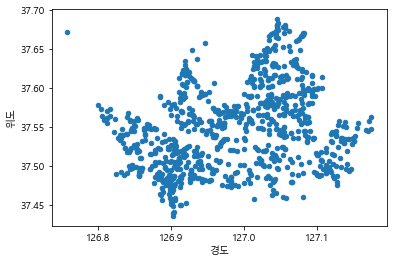

In [65]:
plt.figure(figsize=(15,10))
hwaeng.plot(x='경도', y='위도', kind='scatter')

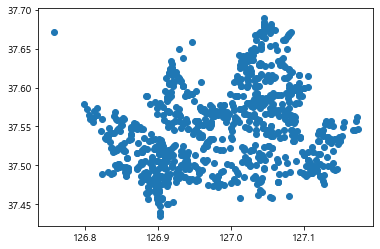

In [66]:
plt.scatter(data=hwaeng, x='경도', y='위도')

In [67]:
hwaeng

,경도,위도
0,127.034833,37.483840
1,126.903486,37.520151
2,127.034587,37.661877
3,126.964996,37.558996
4,126.943522,37.482183
...,...,...
893,127.042184,37.483710
894,126.853573,37.528531
895,127.055378,37.678158
896,127.033427,37.582829


In [80]:
sm_seoul_chasa_t=sm_seoul_chasa[sm_seoul_chasa['사고유형']=='차도통행중']

In [81]:
sm_seoul_chasa_t.index=range(sm_seoul_chasa_t.shape[0])

In [82]:
sm_seoul_chasa_t

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012010101,야간,일,1,1,0,0,0,서울,은평구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,949860,1957179,126.931890,37.612680
1,2012,2012010601,야간,금,1,1,0,0,0,서울,종로구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,957370,1952786,127.017234,37.573462
2,2012,2012011617,주간,월,1,1,0,0,0,서울,마포구,차대사람,차도통행중,차도통행중,보행자 보호의무 위반,교차로,교차로부근,화물차,보행자,951202,1949108,126.947631,37.540006
3,2012,2012021205,야간,일,1,1,0,0,0,서울,강북구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,959120,1957115,127.036810,37.612560
4,2012,2012020413,주간,토,1,1,0,0,0,서울,양천구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승합차,보행자,941300,1947434,126.835690,37.524342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2020,2020120913,주간,수,1,1,0,0,0,서울,도봉구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,교차로,교차로부근,화물차,보행자,959504,1959864,127.040914,37.637266
190,2020,2020090320,야간,목,1,1,0,0,0,서울,노원구,차대사람,차도통행중,차도통행중,과속,단일로,기타단일로,승용차,보행자,961788,1960047,127.066767,37.639141
191,2020,2020101000,야간,토,1,1,0,0,0,서울,마포구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,946238,1952290,126.891898,37.569046
192,2020,2020122109,주간,월,1,1,0,0,0,서울,구로구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,945515,1944656,126.883591,37.499561


In [ ]:
lat_mean=sm_seoul_chasa_t['위도'].mean()
long_mean=sm_seoul_chasa_t['경도'].mean()

In [87]:
# 차도통행중 사망자 위치
m=folium.Map(location=[lat_mean, long_mean],zoom_start=12)
for i in sm_seoul_chasa_t.index:
    lat=sm_seoul_chasa_t.loc[i, '위도']
    long=sm_seoul_chasa_t.loc[i, '경도']
    folium.CircleMarker(
        location = [lat, long],
        radius=3,
        color="blue"
    ).add_to(m)
m

In [90]:
sm_seoul['법규위반'].value_counts()

안전운전 의무 불이행    2009
신호위반            369
중앙선 침범          149
과속              143
보행자 보호의무 위반     133
기타               98
안전거리 미확보         74
교차로 통행방법 위반      14
Name: 법규위반, dtype: int64

In [93]:
sm_seoul_gwasok=sm_seoul[sm_seoul['법규위반']=='과속']

In [94]:
sm_seoul_gwasok.index=range(sm_seoul_gwasok.shape[0])

In [95]:
sm_seoul_gwasok

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012011204,야간,목,1,1,0,0,0,서울,관악구,차대사람,횡단중,횡단중,과속,단일로,횡단보도상,승용차,보행자,950801,1942695,126.943522,37.482183
1,2012,2012011503,야간,일,1,2,1,0,0,서울,구로구,차대차,측면충돌,측면충돌,과속,단일로,기타단일로,승용차,승용차,945321,1946361,126.881270,37.514917
2,2012,2012032000,야간,화,1,4,2,0,1,서울,강남구,차대차,측면충돌,측면충돌,과속,교차로,교차로내,승용차,승용차,961566,1945196,127.065148,37.505236
3,2012,2012031022,야간,토,1,2,1,0,0,서울,노원구,차대사람,횡단중,횡단중,과속,교차로,교차로내,승용차,보행자,962857,1963184,127.078841,37.667423
4,2012,2012040500,야간,목,1,1,0,0,0,서울,양천구,차대사람,횡단중,횡단중,과속,단일로,기타단일로,승용차,보행자,943772,1950137,126.863453,37.548858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2020,2020123017,주간,수,1,2,1,0,0,서울,도봉구,차대차,측면충돌,측면충돌,과속,단일로,기타단일로,승용차,이륜차,960188,1965980,127.048331,37.692793
139,2020,2020090320,야간,목,1,1,0,0,0,서울,노원구,차대사람,차도통행중,차도통행중,과속,단일로,기타단일로,승용차,보행자,961788,1960047,127.066767,37.639141
140,2020,2020092417,주간,목,1,5,2,2,0,서울,강서구,차대차,기타,기타,과속,교차로,교차로내,승용차,승용차,939799,1952891,126.818233,37.573443
141,2020,2020120214,주간,수,1,2,0,1,0,서울,구로구,차대차,측면충돌,측면충돌,과속,단일로,기타단일로,이륜차,개인형이동수단(PM),946383,1942348,126.893647,37.478753


In [103]:
sm_seoul['주야'].value_counts()/len(sm_seoul)

야간    0.578789
주간    0.421211
Name: 주야, dtype: float64

In [104]:
sm_seoul_gwasok['주야'].value_counts()/len(sm_seoul_gwasok['주야'])

야간    0.832168
주간    0.167832
Name: 주야, dtype: float64

In [112]:
sm_seoul.groupby(['법규위반','주야']).count()

발생년  발생년월일시    요일  사망자수  사상자수  중상자수  경상자수  부상신고자수  발생지시도  \
법규위반        주야                                                              
과속          야간   119     119   119   119   119   119   119     119    119   
            주간    24      24    24    24    24    24    24      24     24   
교차로 통행방법 위반 야간     5       5     5     5     5     5     5       5      5   
            주간     9       9     9     9     9     9     9       9      9   
기타          야간    31      31    31    31    31    31    31      31     31   
            주간    67      67    67    67    67    67    67      67     67   
보행자 보호의무 위반 야간    48      48    48    48    48    48    48      48     48   
            주간    85      85    85    85    85    85    85      85     85   
신호위반        야간   207     207   207   207   207   207   207     207    207   
            주간   162     162   162   162   162   162   162     162    162   
안전거리 미확보    야간    36      36    36    36    36    36    36      36     36   
            주간    38      38    38    38    38    38    38      38     38   
안전운전 의무 불이행 야간  1194    1194  1194  1194  1194  1194  1194    1194   1194   
            주간   815     815   815   815   815   815   815     815    815   
중앙선 침범      야간    90      90    90    90    90    90    90      90     90   
            주간    59      59    59    59    59    59    59      59     59   

                발생지시군구  사고유형_대분류  사고유형_중분류  사고유형  도로형태_대분류  도로형태  \
법규위반        주야                                                     
과속          야간     119       119       119   119       119   119   
            주간      24        24        24    24        24    24   
교차로 통행방법 위반 야간       5         5         5     5         5     5   
            주간       9         9         9     9         9     9   
기타          야간      31        31        31    31        31    31   
            주간      67        67        67    67        67    67   
보행자 보호의무 위반 야간      48        48        48    48        48    48   
            주간      85        85        85    85        85    85   
신호위반        야간     207       207       207   207       207   207   
            주간     162       162       162   162       162   162   
안전거리 미확보    야간      36        36        36    36        36    36   
            주간      38        38        38    38        38    38   
안전운전 의무 불이행 야간    1194      1194      1194  1194      1194  1194   
            주간     815       815       815   815       815   815   
중앙선 침범      야간      90        90        90    90        90    90   
            주간      59        59        59    59        59    59   

                당사자종별_1당_대분류  당사자종별_2당_대분류  발생위치X_UTMK  발생위치Y_UTMK    경도    위도  
법규위반        주야                                                                  
과속          야간           119           119         119         119   119   119  
            주간            24            24          24          24    24    24  
교차로 통행방법 위반 야간             5             5           5           5     5     5  
            주간             9             9           9           9     9     9  
기타          야간            31            31          31          31    31    31  
            주간            67            67          67          67    67    67  
보행자 보호의무 위반 야간            48            48          48          48    48    48  
            주간            85            85          85          85    85    85  
신호위반        야간           207           207         207         207   207   207  
            주간           162           162         162         162   162   162  
안전거리 미확보    야간            36            36          36          36    36    36  
            주간            38            38          38          38    38    38  
안전운전 의무 불이행 야간          1194          1194        1194        1194  1194  1194  
            주간           815           815         815         815   815   815  
중앙선 침범      야간            90            90          90          90    90    90  
            주간            59

In [109]:
sm_seoul

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012010101,야간,일,1,1,0,0,0,서울,은평구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,949860,1957179,126.931890,37.612680
9,2012,2012010102,야간,일,1,4,0,3,0,서울,중구,차대차,측면충돌,측면충돌,신호위반,교차로,교차로내,승합차,승용차,955269,1952221,126.993477,37.568273
16,2012,2012010102,야간,일,1,1,0,0,0,서울,서초구,차대사람,횡단중,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,958875,1942835,127.034833,37.483840
29,2012,2012010118,야간,일,1,1,0,0,0,서울,영등포구,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,승합차,보행자,947288,1946929,126.903486,37.520151
37,2012,2012010307,주간,화,1,2,0,1,0,서울,관악구,차대차,기타,기타,안전거리 미확보,단일로,기타단일로,승용차,이륜차,951194,1942654,126.947969,37.481835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36842,2020,2020121210,주간,토,1,3,1,1,0,서울,동대문구,차대사람,기타,기타,신호위반,교차로,교차로횡단보도내,승용차,보행자,959241,1953481,127.038392,37.579863
37022,2020,2020091819,야간,금,1,1,0,0,0,서울,송파구,차대사람,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승합차,보행자,966618,1948511,127.122156,37.535312
37049,2020,2020093005,야간,수,1,2,1,0,0,서울,송파구,차대차,측면충돌,측면충돌,신호위반,교차로,교차로내,원동기장치자전거,화물차,964001,1945908,127.092562,37.511758
37059,2020,2020101004,야간,토,1,1,0,0,0,서울,송파구,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,966069,1944452,127.116168,37.498750


In [96]:
# 과속으로 인한 사망자 위치
m=folium.Map(location=[lat_mean, long_mean],zoom_start=12)
for i in sm_seoul_gwasok.index:
    lat=sm_seoul_gwasok.loc[i, '위도']
    long=sm_seoul_gwasok.loc[i, '경도']
    folium.CircleMarker(
        location = [lat, long],
        radius=3,
        color="blue"
    ).add_to(m)
m

In [97]:
s_2016

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2016010100100001,2016년 1월 1일 00시,금요일,서울특별시 중구 봉래동2가,경상사고,0,0,1,0,차대차 - 측면직각충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,21세,상해없음,승용,남,57세,상해없음
1,2016010100100002,2016년 1월 1일 00시,금요일,서울특별시 동대문구 답십리동,경상사고,0,0,1,0,차대차 - 측면직각충돌,직진우회전진행방해,포장 - 건조,흐림,교차로 - 교차로부근,승용,남,55세,상해없음,승용,남,53세,경상
2,2016010100100003,2016년 1월 1일 00시,금요일,서울특별시 영등포구 영등포동1가,경상사고,0,0,2,0,차대차 - 측면직각충돌,안전거리미확보,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,54세,기타불명,승용,여,22세,경상
3,2016010100100004,2016년 1월 1일 00시,금요일,서울특별시 중랑구 면목동,경상사고,0,0,1,0,차대차 - 측면충돌,교차로운행방법위반,포장 - 건조,맑음,교차로 - 교차로안,이륜,남,16세,상해없음,자전거,남,69세,경상
4,2016010100100005,2016년 1월 1일 00시,금요일,서울특별시 양천구 신월동,중상사고,0,1,0,0,차대사람 - 차도통행중,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,56세,상해없음,보행자,여,83세,중상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40034,2016123100100629,2016년 12월 31일 23시,토요일,서울특별시 강서구 내발산동,중상사고,0,1,0,0,차대차 - 정면충돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,원동기,남,17세,중상,승용,남,46세,상해없음
40035,2016123100100630,2016년 12월 31일 23시,토요일,서울특별시 강동구 성내동,경상사고,0,0,1,0,차대차 - 기타,직진우회전진행방해,포장 - 건조,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,남,44세,경상
40036,2016123100100631,2016년 12월 31일 23시,토요일,서울특별시 송파구 풍납동,중상사고,0,1,0,0,차대사람 - 기타,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로안,승용,남,75세,상해없음,보행자,남,49세,중상
40037,2016123100100632,2016년 12월 31일 23시,토요일,서울특별시 은평구 갈현동,부상신고사고,0,0,0,2,차대차 - 측면충돌,중앙선침범,포장 - 건조,맑음,단일로 - 횡단보도부근,승용,남,62세,상해없음,승용,남,45세,부상신고


In [122]:
s=sm_seoul_gwasok.groupby(['발생년','주야']).count()['요일'].to_frame().reset_index()

In [127]:
s.columns=['발생년','주야','사고횟수']
s

,발생년,주야,사고횟수
0,2012,야간,10
1,2013,야간,10
2,2013,주간,3
3,2014,야간,18
4,2014,주간,3
5,2015,야간,12
6,2016,야간,12
7,2016,주간,2
8,2017,야간,18
9,2017,주간,2


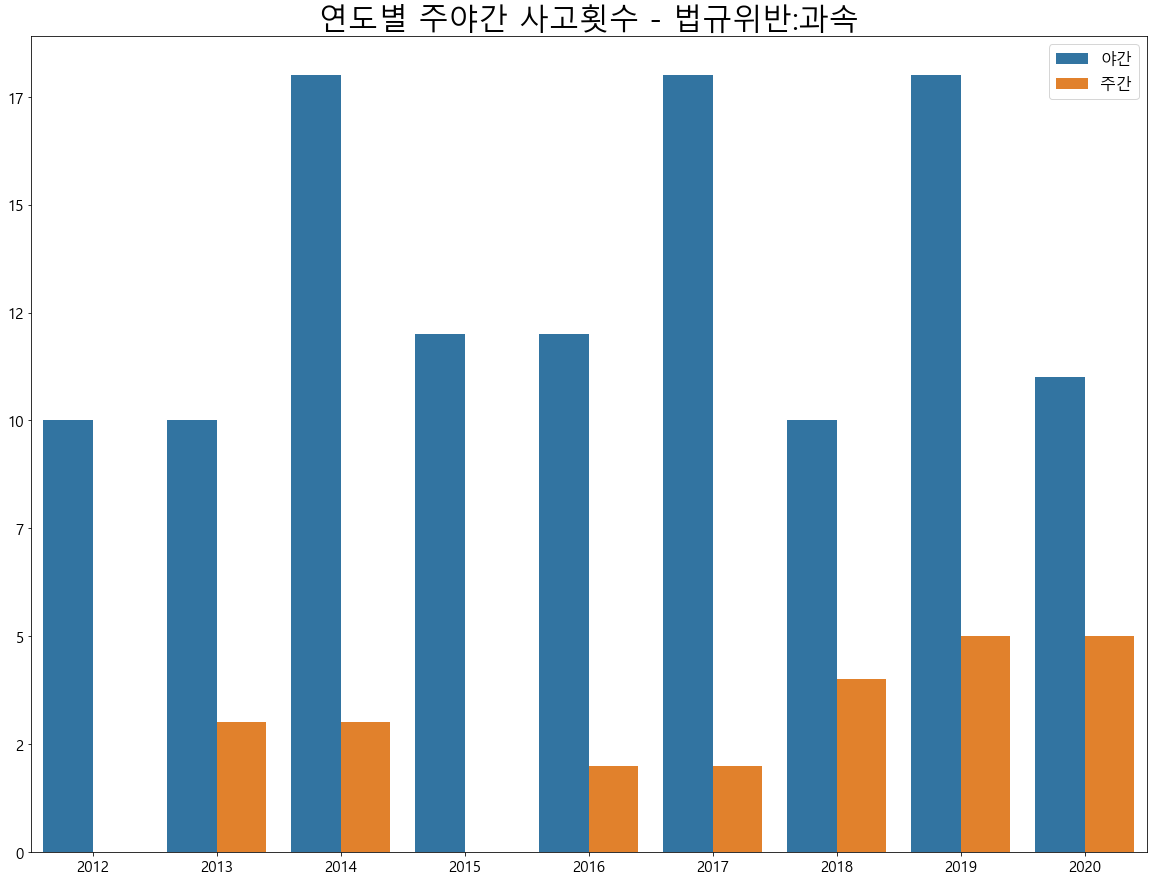

In [141]:
plt.figure(figsize=(20,15))
g=sns.barplot(data=s,x='발생년',y='사고횟수',hue='주야')
g.legend(prop={'size': 16})
a=g.get_yticks()
a=[int(i) for i in a]
g.set_yticklabels(labels=a, size = 15)
b=s['발생년'].unique()
g.set_xticklabels(labels=b, size = 15)
plt.title('연도별 주야간 사고횟수 - 법규위반:과속', fontsize=30)
g.set_xlabel(None) 
g.set_ylabel(None)
plt.savefig('연도별 주야간 사고횟수 - 법규위반:과속.png')

In [138]:
s['발생년'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)